# Popolazione Comune di Prato

Fonte dati: http://odn.comune.prato.it/dataset/

#### Non lavoro per il Comune di Prato.

In [3]:
import requests
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
pd.set_option('mode.chained_assignment', None)

In [86]:
df = pd.read_csv('http://odn.comune.prato.it/dataset/bdb2f797-bf2d-44ea-a411-19f0ae7bce2f/resource/d1a3ac64-f92a-4973-a1e8-11c902531dd1/download/5popolazionexetaesezcens311219.csv', sep = ",", encoding = "ISO-8859-1")
# Pulizia DataFrame
df.rename(columns = df.iloc[0], inplace = True)
df.drop(0, axis = 0, inplace = True)
df.reset_index(inplace = True)
df.drop("index", axis = 1, inplace = True)

In [87]:
dic_num_age = {}
df_no = df.drop(["Sezione di censimento", "Totale"], axis = 1)
for i in df_no.columns:
    for j in range(len(df_no)):
        if df_no[i][j] == "-":
            df_no[i][j] = "0"
for i in df_no.columns:
    for j in range(len(df_no)):
         df_no[i][j] = int(df_no[i][j])
for i in df_no.columns:
    dic_num_age[i] = df_no[i].sum()

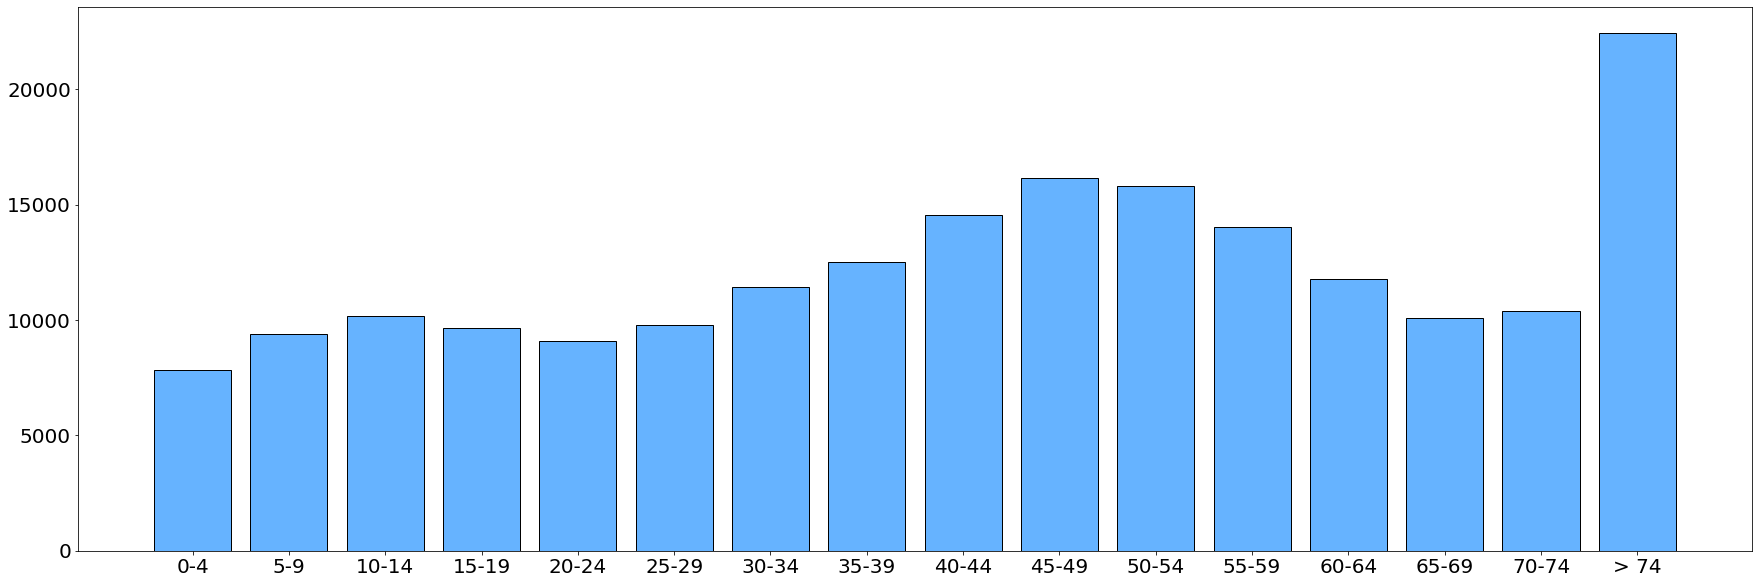

In [88]:
plt.figure(figsize = (30,10))
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.bar(dic_num_age.keys(), height = dic_num_age.values(), color = '#66b3ff', edgecolor = "black")
plt.show()

# Popolazione Totale pratese, Dati del 31/12/2019

In [89]:
for i in range(len(df)):
    df['Totale'][i] = int(df['Totale'][i])
tot = df['Totale'].sum()
tot

195089

# Percentuale per fascia di età

In [90]:
dic_perc_age = {}
for i in dic_num_age.keys():
    dic_perc_age[i] = dic_num_age[i] / tot
age_perc = list(dic_perc_age.keys())
value_perc = list(dic_perc_age.values())

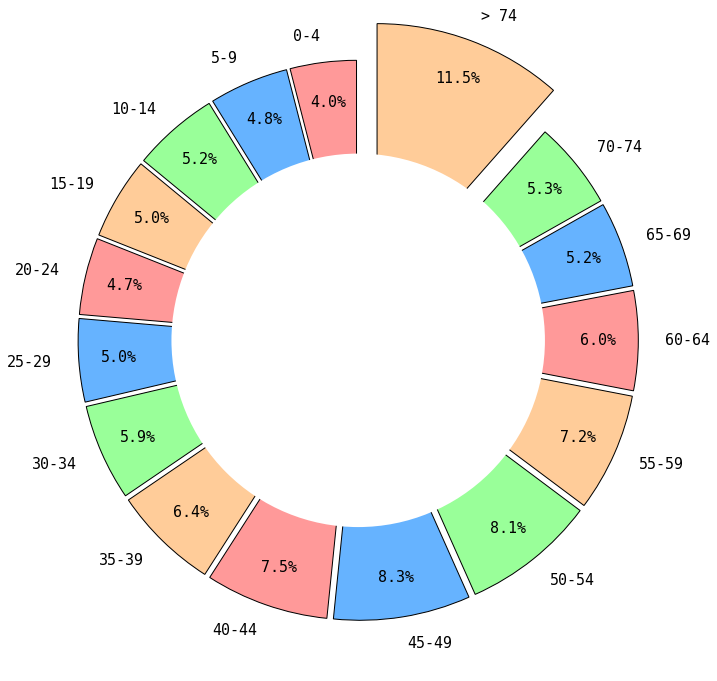

In [91]:
labels = age_perc
sizes = value_perc
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.20)

plt.figure(figsize = (10,10))
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,
        explode = explode, textprops={'size': 15, "family": "monospace"},
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#ax1.axis('equal') 
plt.tight_layout()
plt.show()

In [92]:
## continua...